###  Interseccion de funciones

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
rango=[0,np.pi]

def f1(x):
    return np.sin(x)
def f2(x):
    return np.cos(x)/(x+1)

In [46]:
x_array=np.arange(rango[0],rango[1],.001)
y1_array=[]
y2_array=[]

ptosx=[]
ptosy1=[]
ptosy2=[]

for i in range(len(x_array)):
    y1_array.append(f1(x_array[i]))
    y2_array.append(f2(x_array[i]))

# Verificamos que haya interseccion
for i in range(len(x_array)-1):
    if y1_array[i]<y2_array[i] and y1_array[i+1]>=y2_array[i+1] or y1_array[i]>=y2_array[i] and y1_array[i+1]<y2_array[i+1]:
        
        ptosx.append(x_array[i])
        ptosx.append(x_array[i+1])
        
        ptosy1.append(y1_array[i])
        ptosy1.append(y1_array[i+1])
    
        ptosy2.append(y2_array[i])
        ptosy2.append(y2_array[i+1])


def cruce_rectas(x1,x2,y11,y12,y21,y22):
    
    m1=(y12-y11)/(x2-x1)
    m2=(y22-y21)/(x2-x1)
    
    if (m1!=m2):
        
        b1=x1*(y11-y12)/(x2-x1)+y11
        b2=x1*(y21-y22)/(x2-x1)+y21

        #Pto de interseccion (a,c)
        a=(b2-b1)/(m1-m2)
        c=a*m1+b1
    
        return (a,c)

ptos_cruce=[]
for i in range(0,len(ptosx),2):
    ptos_cruce.append(cruce_rectas(ptosx[i],ptosx[i+1],ptosy1[i],ptosy1[i+1],ptosy2[i],ptosy2[i+1]))
    

print("Se encontraron %d intersecciones en el rango dado \n" %(len(ptos_cruce)))
for i in range(len(ptos_cruce)):
    print (ptos_cruce[i])

Se encontraron 1 intersecciones en el rango dado 

(0.5677820694227707, 0.53776339925247)


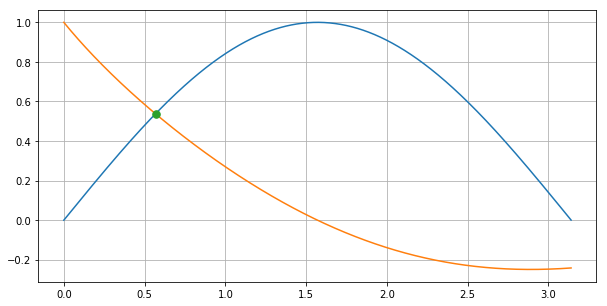

In [47]:
#Figura

crucex=[]
crucey=[]

for i in range(len(ptos_cruce)):
    crucex.append(ptos_cruce[i][0])
    crucey.append(ptos_cruce[i][1])

fig=plt.figure(figsize=(10,5))
ax=plt.axes()
ax.grid()
ax.plot(x_array,y1_array)
ax.plot(x_array,y2_array)
ax.plot(crucex,crucey,'.',markersize=15)
plt.show()